In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Getting data 

df =pd.read_csv("netflix_titles.csv")

In [3]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [4]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Data cleansing, also known as data cleaning or scrubbing, identifies and fixes errors, duplicates, and irrelevant data from a raw dataset.


Null values are replaced by unknown, not listed

In [7]:
df.director = df.director.fillna("unknown")

In [8]:
df.cast= df.cast.fillna("Not Listed")

In [9]:
df.country=df.country.fillna("unknown")

In [10]:
df.rating=df.rating.fillna("Unknown")

In [11]:
df.date_added

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8807, dtype: object

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [14]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Listed,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown,Not Listed,unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [15]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

# Exploratory data analysis: Data visualization, insights 

Exploratory Data Analysis (EDA) is a process of describing the data by means of statistical and visualization techniques 
in order to bring important aspects of that data into focus for further analysis

In [16]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8794 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8794 non-null   object
 1   type          8794 non-null   object
 2   title         8794 non-null   object
 3   director      8794 non-null   object
 4   cast          8794 non-null   object
 5   country       8794 non-null   object
 6   date_added    8794 non-null   object
 7   release_year  8794 non-null   int64 
 8   rating        8794 non-null   object
 9   duration      8794 non-null   object
 10  listed_in     8794 non-null   object
 11  description   8794 non-null   object
dtypes: int64(1), object(11)
memory usage: 893.1+ KB


In [18]:
df.country.value_counts().head(10)

United States     2809
India              972
unknown            830
United Kingdom     418
Japan              244
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: country, dtype: int64

<Axes: >

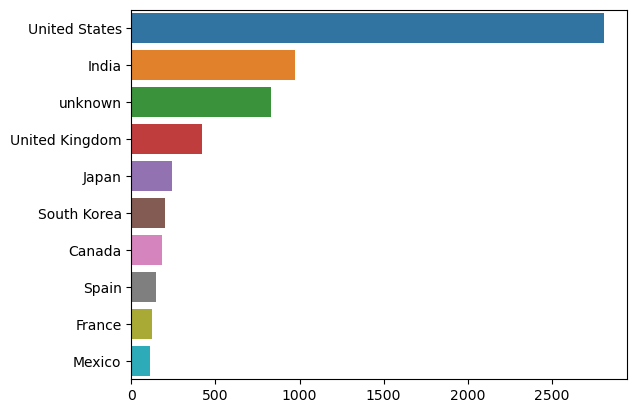

In [19]:
#content produced by top 10 countries
sns.barplot(y=df.country.value_counts().head(10).index, x=df.country.value_counts().head(10).values)

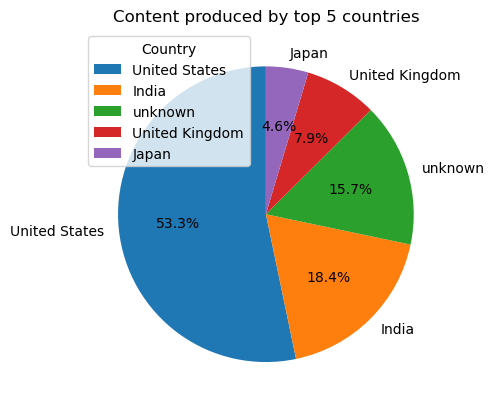

In [20]:
plt.pie(df.country.value_counts().head(5),labels=df.country.value_counts().head().index,startangle=90, autopct='%.1f%%')
plt.legend(loc='upper left', title="Country")
plt.title('Content produced by top 5 countries')
plt.show()

In [21]:
df.rating.value_counts().head(10)

TV-MA    3205
TV-14    2157
TV-PG     861
R         799
PG-13     490
TV-Y7     333
TV-Y      306
PG        287
TV-G      220
NR         79
Name: rating, dtype: int64

Text(0, 0.5, 'Counts')

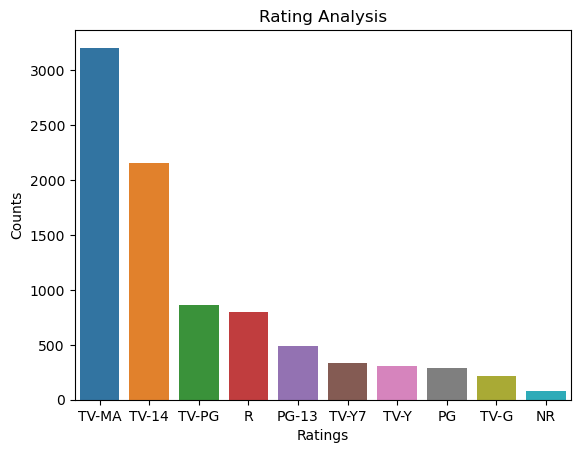

In [22]:
sns.barplot(y=df.rating.value_counts().head(10).values, x=df.rating.value_counts().head(10).index)
plt.title('Rating Analysis')
plt.xlabel('Ratings')
plt.ylabel('Counts')

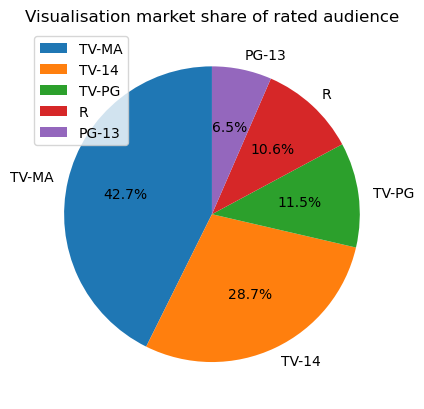

In [23]:
# Visualisation market share of rated audience

plt.pie(df.rating.value_counts().head(5), labels=df.rating.value_counts().head(5).index, startangle=90, autopct='%.1f%%')
plt.title('Visualisation market share of rated audience')
plt.legend()
plt.show()

#### TV-MA holds the largest market share, constituting approximately 42.7% of the top 5 ratings. This dominance emphasizes a significant demand for mature content, showcasing a substantial audience base for explicit and intense material.

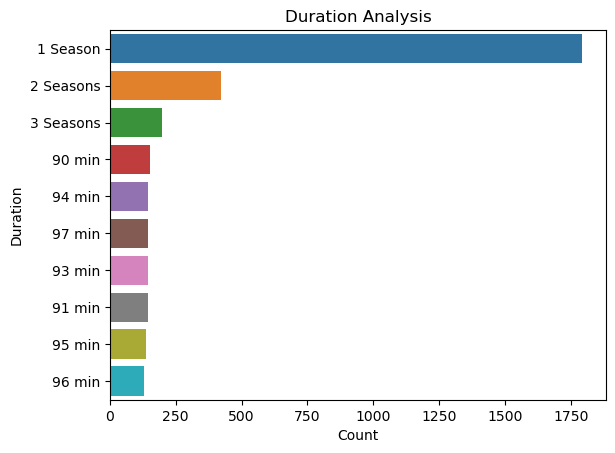

In [24]:
sns.barplot(y=df.duration.value_counts().head(10).index, x=df.duration.value_counts().head(10).values)
plt.title('Duration Analysis')
plt.xlabel('Count')
plt.ylabel('Duration')
plt.show()

In [25]:
# since India is rapidly growing market, we can see their trends in content

df[df.country=='India'].rating.value_counts().head()

TV-14    550
TV-MA    248
TV-PG    134
TV-Y7     14
TV-G       9
Name: rating, dtype: int64

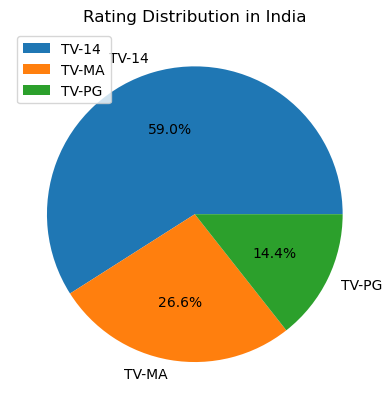

In [26]:
plt.pie(df[df.country=='India'].rating.value_counts().head(3), labels= df[df.country=='India'].rating.value_counts().head(3).index , autopct='%.1f%%')
plt.title('Rating Distribution in India')
plt.legend()
plt.show()

In [27]:
# Understanding data on the basis of type of content

df.type.value_counts()

Movie      6128
TV Show    2666
Name: type, dtype: int64

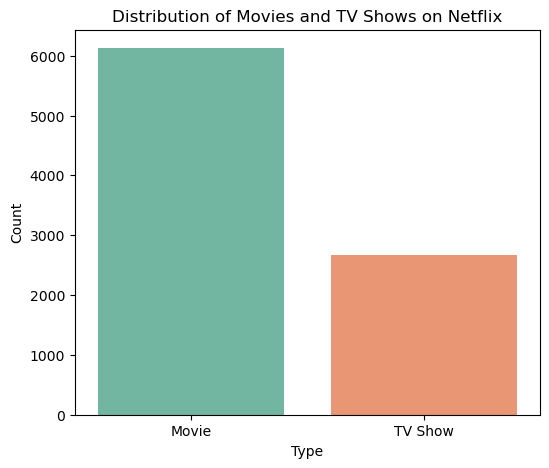

In [28]:
plt.figure(figsize=(6, 5))
sns.countplot(x='type', data=df, palette="Set2")

plt.title('Distribution of Movies and TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

Analysis of Content Distribution:
The data reveals a significant disparity in the distribution of content on Netflix:

Movies:

With 6129 entries, movies constitute the majority of the content, showcasing a preference for shorter and potentially more time-efficient content. This higher count may align with the trend of shorter attention spans or a preference for standalone narratives.
TV Shows:

Following movies, TV shows have 2664 entries, almost one-third of the movie count. This could be attributed to factors such as higher production budgets, longer production times, or the evolving nature of storytelling in a serialized format.

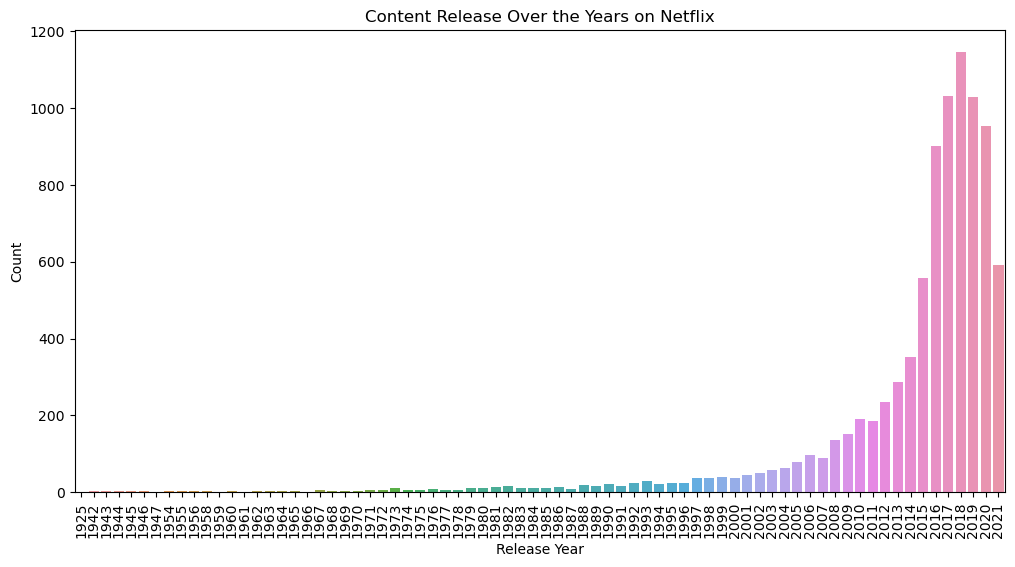

In [29]:
# Understanding data on the basis of release years 

plt.figure(figsize=(12, 6))
sns.countplot(x='release_year', data=df)

plt.title('Content Release Over the Years on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

Observations on Content Release Trend:
The line plot depicting content release trends over the years reveals several notable patterns:

1997 to 2014:
The trend exhibits a gradual increase in content counts from 1997 to 2014. During this period, there is a steady rise, suggesting a growing presence of content on Netflix.

2015:
A significant spike is observed in 2015, indicating a substantial increase in content releases. This could be attributed to various factors such as increased investment in original content, partnerships, or a strategic shift in Netflix's content strategy.

2016 to 2020:
Following the spike, the trend maintains a relatively high count from 2016 to 2020, reflecting sustained efforts in content production and expansion during this period.

2021:
The lower count in 2021 may be due to incomplete data collection rather than an actual decrease in content production. It is essential to consider data completeness when interpreting the count for the most recent year.